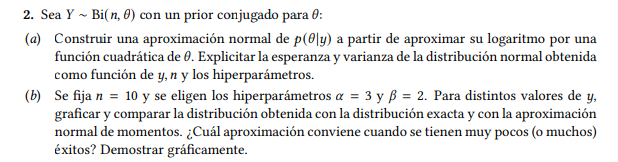

spoiler / respuesta: Cuando se tienen pocos exitos, la aproximacion normal de laplace (usando la moda) es mas efectiva y se ve mas cercana a la beta real. En los casos con mas exitos, pareciera la similitud entre cualquier aproximacion y la real, es muy parecida, podria usarse cualquiera.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

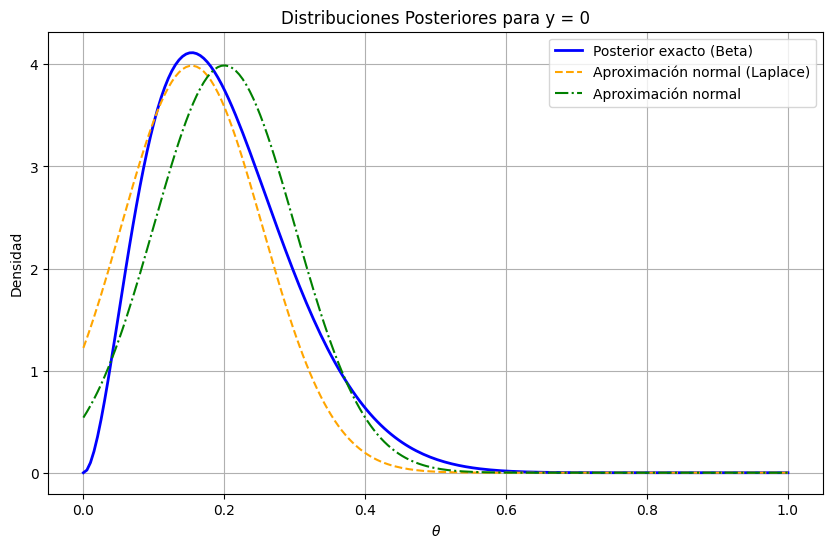

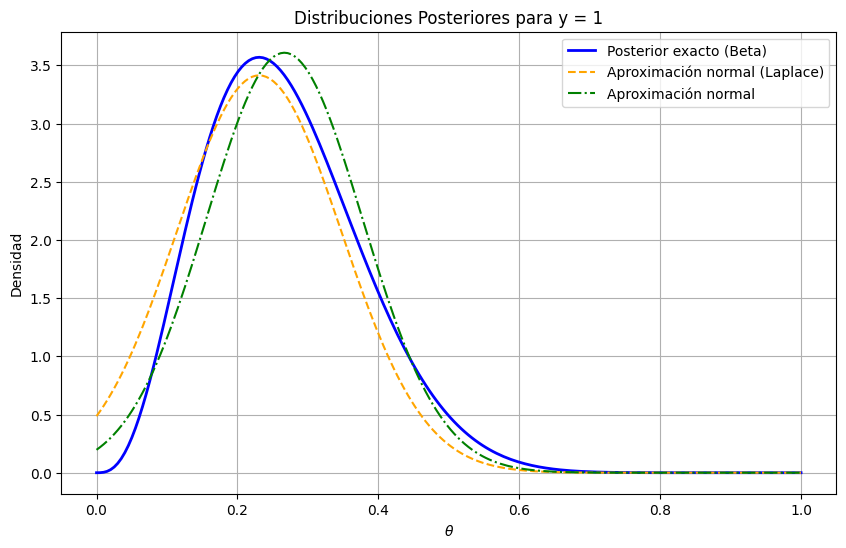

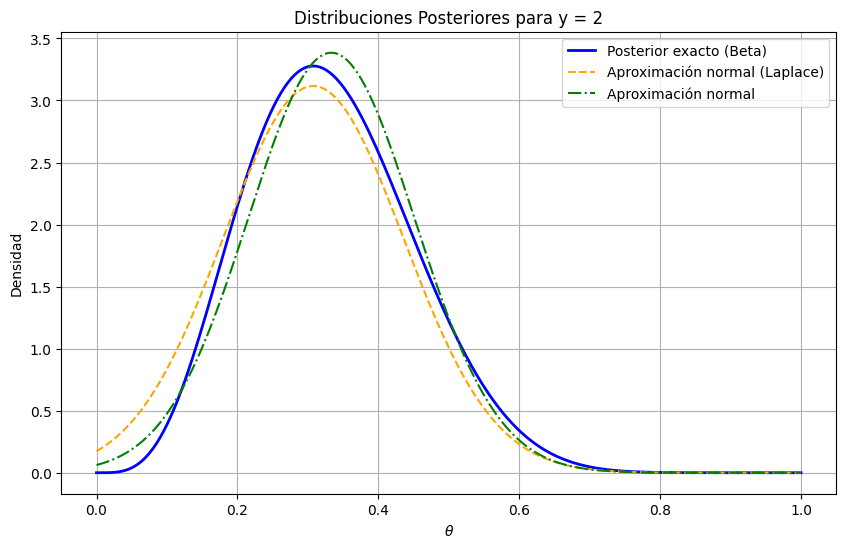

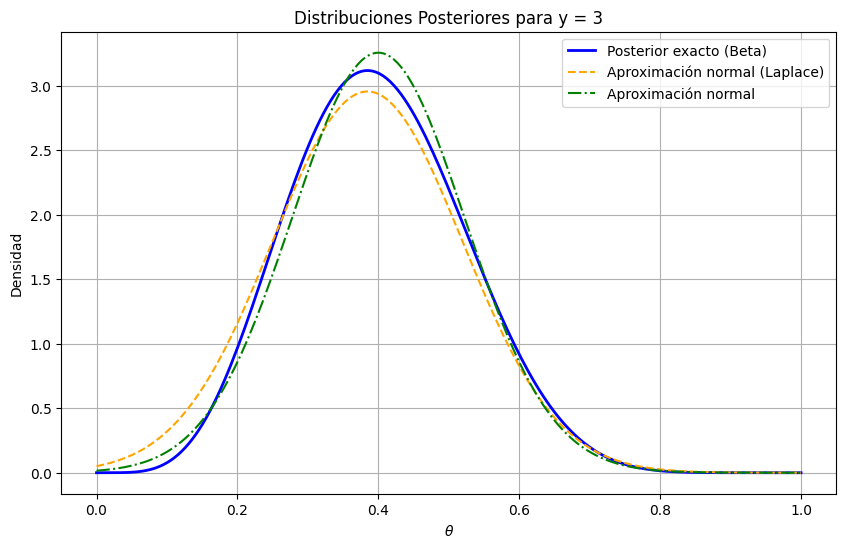

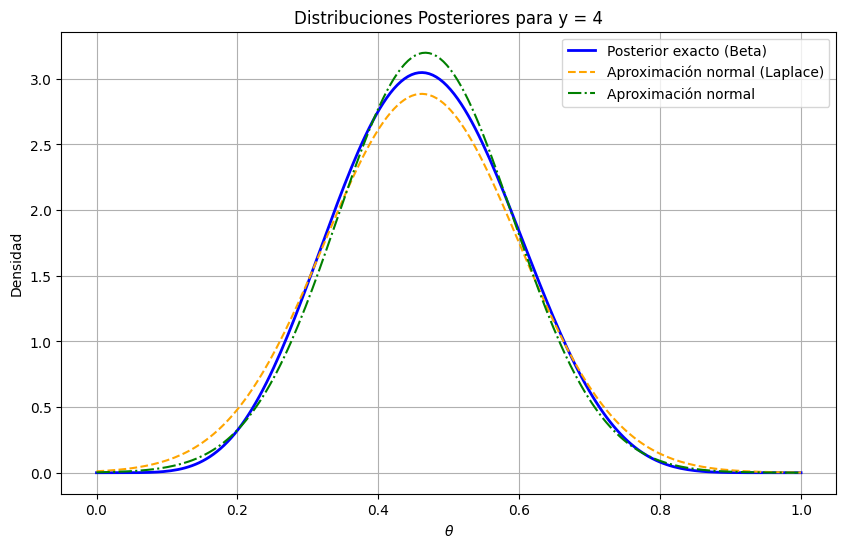

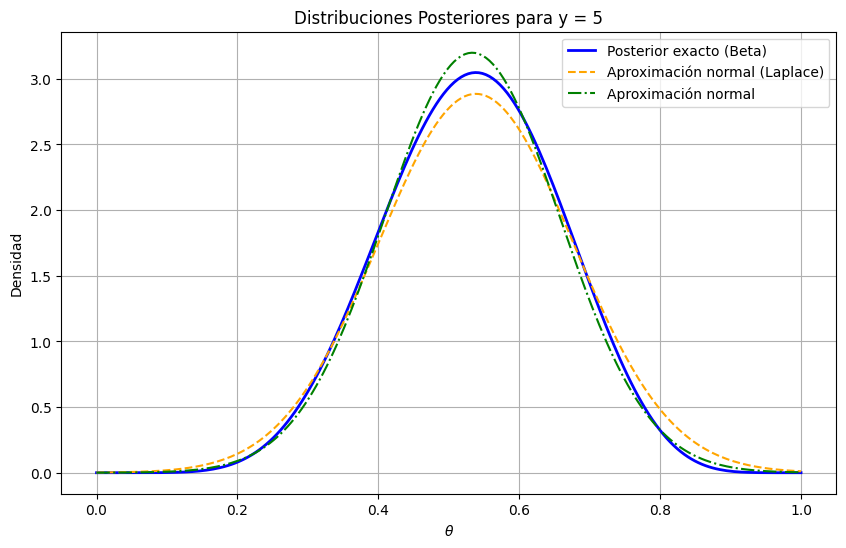

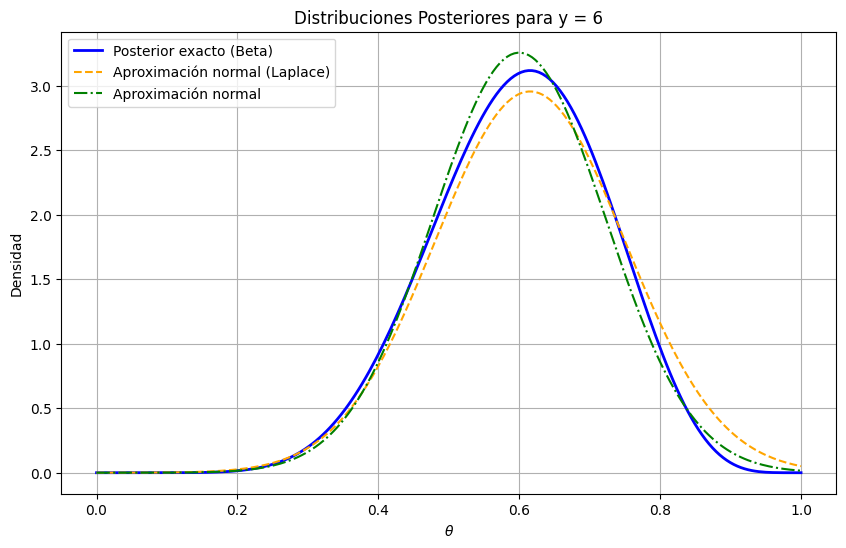

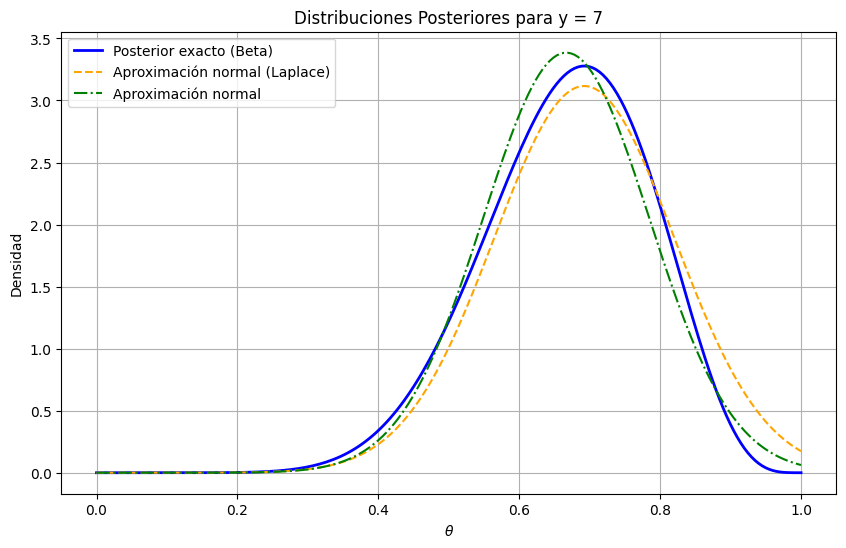

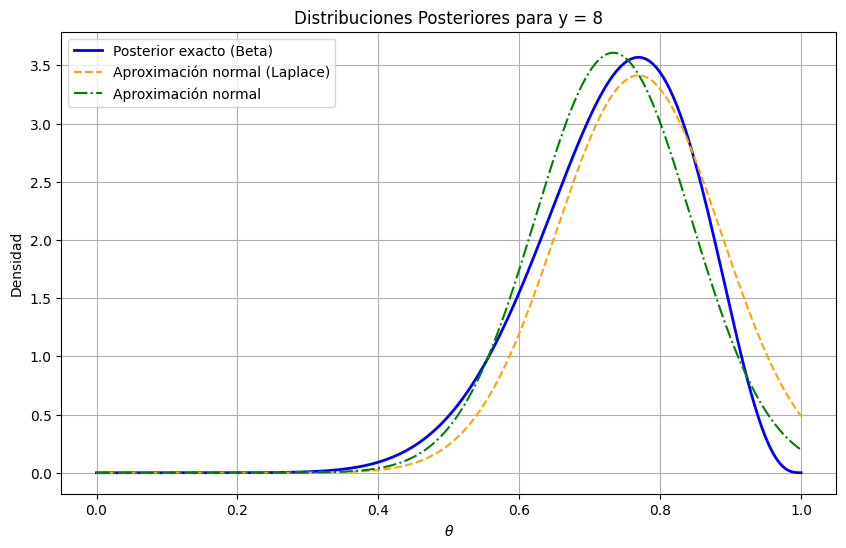

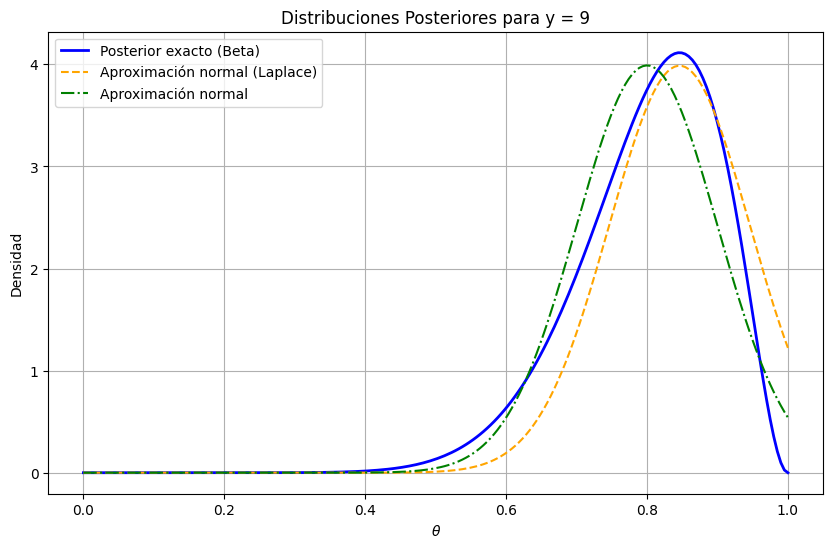

In [20]:
n = 10          
alpha_p = 3 
beta_p = 2  
x = np.linspace(0, 1, 200) 

for y in range(0,10) :  
    posterior_exacta = stats.beta.pdf(x, alpha_p + y, beta_p + n - y)
    
    #replico la normal con la aproximacion de laplace (como llegue a esto esta en la hoja escrita)
    moda = (alpha_p + y - 1) / (beta_p + n +alpha_p - 2)  
    var = 1 / -(- (alpha_p + y - 1) / (moda**2) - (beta_p + n - y - 1) / ((1 - moda)**2))
    aproximacion_taylor = stats.norm.pdf(x, moda, np.sqrt(var))
    
    #aproximacion a partir de la esperanza y varianza conocida (por las dudas)
    esp = (alpha_p + y) / (alpha_p + beta_p + n)
    varianza = ((alpha_p + y) * (beta_p + n - y)) / ((alpha_p + beta_p + n)**2 * (alpha_p + beta_p + n + 1))
    normal = stats.norm.pdf(x, esp, np.sqrt(varianza))
    

    plt.figure(figsize=(10, 6))
    plt.plot(x, posterior_exacta, label="Posterior exacto (Beta)", color='blue', lw=2)
    plt.plot(x, aproximacion_taylor, label="Aproximación normal (Laplace)", color='orange', linestyle='--')
    plt.plot(x, normal , label="Aproximación normal", color='green', linestyle='-.')
    
    plt.title(f"Distribuciones Posteriores para y = {y}")
    plt.xlabel(r"$\theta$")
    plt.ylabel("Densidad")
    plt.legend()
    plt.grid(True)
    plt.show()  



